# Prikazovanje podatkov

# Plotting data

## Knjižnica `matplotlib`

Matplotlib je knjižnica za 2D in 3D risanje v programskem jeziku Python. Vključuje:

* Nadzor nad posameznimi elementi slike.
* Izvoz rezultatov v obliki PNG, PDF, SVG, EPS, in PGF.
* Podpora sintaksi $\LaTeX$

Bistven del uporabnosti knjižnice je, da lahko slike v celoti zgradimo z uporabo ukazov, kar odstrani potrebo po ročnem urejanju. Slednje jo dela zelo primerno za uporabo v znanstvenem delu, kjer lahko generiramo kompleksne prikaze na različnih podatkih brez potrebe po spremembi programske kode.

Spletna stran knjižnice je tudi bogat vir dodatnih primerov: http://matplotlib.org/

## Library `matplotlib`

Matplotlib is a library for 2D and 3D drawing in the Python programming language. It includes:

* Controlling individual image elements.
* Export results in the form of PNG, PDF, SVG, EPS, and PGF.
* Support $\LaTeX$ syntax

An essential part of the library's usefulness is that images can be built entirely using commands, which eliminates the need for manual editing. The latter works very well for use in scientific work, where we can generate complex visualizations on various data without the need to change the program code.

The library's website is also a rich source of additional examples: http://matplotlib.org/

In [1]:
%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../PR.mplstyle')

matplotlib.__version__

'3.8.3'

### Funkcija `plot()`

### Function `plot()`

Funkcija `plot` sprejema parametre:
* podatki na ordinati, 
* podatki na abscisi, 
* ostali parametri (oblikovanje, ...)

The `plot` function accepts parameters:
* data on ordinate,
* data on abscissa,
* other parameters (formatting, ...)

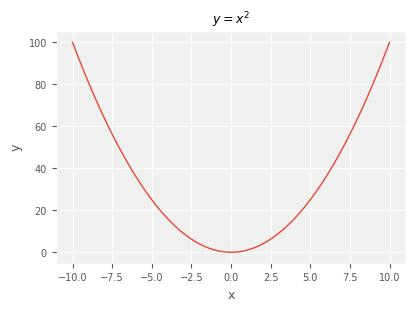

In [2]:
x = np.linspace(-10, 10, 100)
y = x ** 2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y=x^2$');

##### Vprašanje 2-1-1

Nariši funkcije $x^{-3}$, $x^{-2}$, $x^{-1}$, $x^0$, $x^1$, $x^2$, $x^3$ na intervalu $(0, 5]$. To dosežeš z večkratnim klicanjem funkcije `plot`, po enkrat za vsako krivuljo.

##### Question 2-1-1

Draw functions $x^{-3}$, $x^{-2}$, $x^{-1}$, $x^0$, $x^1$, $x^2$, $x^3$ on the interval $(0, 5]$. This is accomplished by repeatedly calling the `plot` function, once for each curve.

[Odgovor](202-1.ipynb#Odgovor-2-1-1)

[Answer](202-1.ipynb#Answer-2-1-1)

### Stili

Najenostavnejši načina za nastavljanje barv je slog, podoben okolju MATLAB; `g` predstavlja zeleno barvo, `b` modro, `r` rdečo, itd.

Lahko pa uporabimo argument `color=...`, kjer barvo podamo z njenim imenom oz. RGB kodo. 

Poizkusimo spreminjati še ostale lastnosti: debelino črt in različne oznake za točke.

### Styles

The simplest way to adjust the colors is a style that is similar to the MATLAB environment; `g` represents the green color, `b` blue, `r` red, etc.

Alternatively, use the `color = ...` argument where the color is given by its name or RGB code.

Let's try to change the other properties: the thickness of the lines and different point markings.

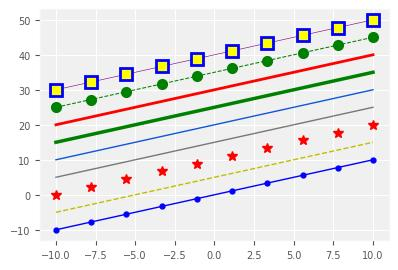

In [3]:
x = np.linspace(-10, 10, 10)
plt.plot(x, x, 'b.-')
plt.plot(x, x+5, 'y--')
plt.plot(x, x+10, 'r*')
plt.plot(x, x+15, color="black", alpha=0.5) 
plt.plot(x, x+20, color="#1155dd")    
plt.plot(x, x+25, color="green", linewidth=2.5)
plt.plot(x, x+30, color="red", lw=2, linestyle='-')
plt.plot(x, x+35, color="green", lw=0.75, ls='--', marker='o')
plt.plot(x, x+40, color="purple", lw=0.42, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Primer: temperature v Stockholmu

V nadaljevanju bomo spoznali različne načine uporabe matplotliba na podatkih, ki smo jih spoznali prejpšnji teden. Za začetek, naložimo podatke in jih narišemo.

### Example: Stockholm temperatures

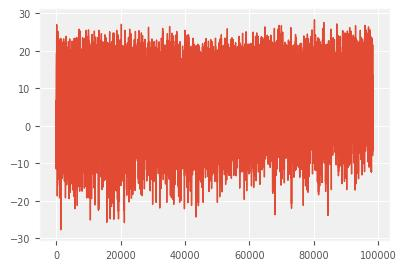

In [4]:
data = np.loadtxt('../data/stockholm.csv', delimiter=",", skiprows=1)
plt.plot(data[:,3]);

Dokaj nepregledno. Poskusimo povečat sliko.

Velikost slike določamo s `figsize` v palcih (inčah, 1 in = 2.4 cm), ločljivost pa s parametrom `dpi`  (število pik (pikslov) na palec. inch). Naslednji ukaz ustvari sliko velikosti 1400x600 pik.

The graph is rather unclear. Let's try making the image bigger.

The size of the image is determined with `figsize` in inches (1 in = 2.4 cm), and the resolution with `dpi` (number of dots (pixels) per inch). The next command creates a 1400x600 pixel image.

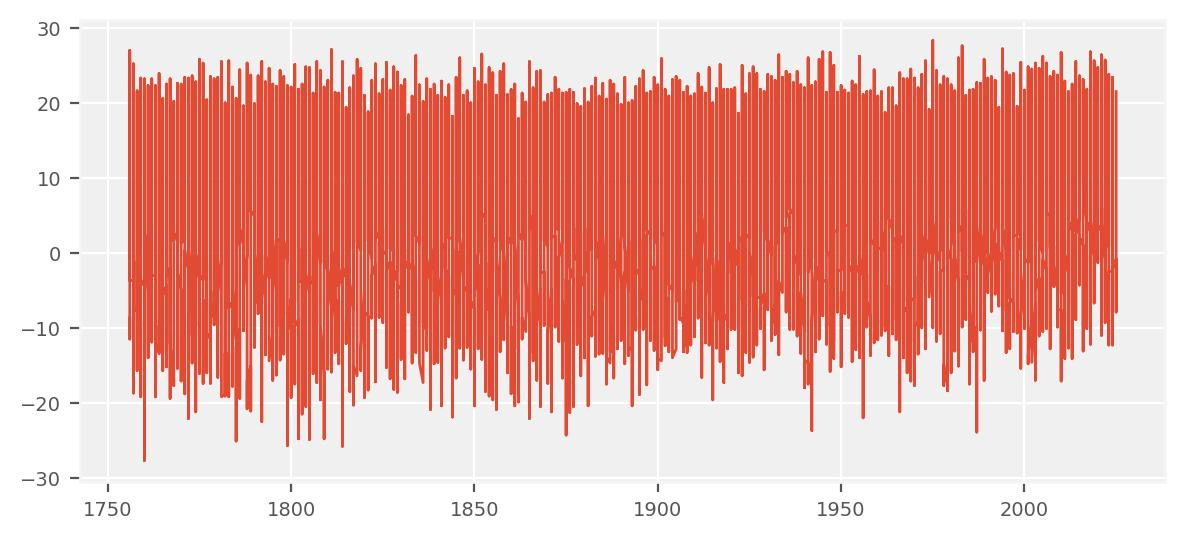

In [5]:
plt.figure(figsize=(7, 3), dpi=200)
plt.plot(data[:,0],data[:,3]);

Boljše, a vsekakor imamo preveč vrednosti. Izračunajmo letna povprečja, tako kot prejšnji teden. Dodajmo še povprečno temperaturo in izračunan trend.

Za boljšo berljivost slike pogosto dodamo naslov, oznake osi in legendo. Na vseh mestih lahko uporabljamo $\LaTeX$ sintakso. Kvalitetna slika vsebuje večino omenjenih elementov.

Z metodama `xticks` in `yticks` nastavimo lokacije, vrednosti in razne lastnosti oznak.

Better, but still too many values. Let's calculate yearly averages like last week. Let's also plot the overall average temperature and the trend.

To increase the image readability, we often add a title, an axis and a legend. In all places, $\LaTeX$ syntax can be used. A quality picture contains most of the above mentioned items.

Using the `xticks` and `yticks` methods, we set locations, values, and other attributes of ticks.

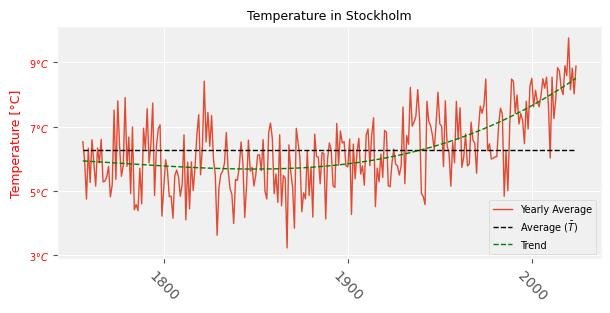

In [6]:
from numpy.polynomial import Polynomial as P

plt.figure(figsize=(7, 3))

years = np.unique(data[:, 0])[:-1].astype(int)
yearly_avg = np.array([data[data[:, 0] == year, 3].mean() for year in years])
plt.plot(years, yearly_avg, label='Yearly Average')

avg_temp = data[:, 3].mean()
plt.plot([years[0], years[-1]], [avg_temp, avg_temp], 'k--', label='Average ($\\bar{T}$)')

p = P.fit(years, yearly_avg, 3).convert()
xx, yy = p.linspace(n=len(years), domain=[years.min(), years.max()])
plt.plot(xx, yy, 'g--', label='Trend')

plt.yticks([3, 5, 7, 9], ['$3°C$', '$5°C$', '$7°C$', '$9°C$'], color='red')
plt.ylabel('Temperature [°C]', color='red')

plt.xticks([1800,1900,2000], rotation=315, fontsize=10)

plt.title('Temperature in Stockholm')
plt.legend(loc='lower right');

### Objektno usmerjen način dela z `matplotlib`

V zgornjih primerih smo uporabljali vmesnik, kjer je bila vsaka slika del *globalnega* okolja. Ta način je uporaben za preprostejše slike. Zahtevnejše prikaze pa omogoča objektno usmerjen način, posebej v primerih, ko imamo opravka z več kot eno sliko naenkrat.

Bistveni del objektno-usmerjenega okolja sta objekta **slika** (ang. *figure*) in **os** (ang. *axis*). Ena slika vsebuje eno ali več osi. Os je vsebovalnik s koordinatnim sistemom, v katerega rišemo objekte (črte, stolpce, oblike, ...). 

Z uporabo okolja `subplots` lahko ustvarimo sliko z več platni. Primerjamo najhladnejše in najtoplejše leto.


### An object-oriented way of working with `matplotlib`

In the above examples, we used an interface where each image was part of the *global* environment. This mode is useful for simpler images. The object-oriented way provides advanced visualizations, especially in cases where we deal with more than one image at a time.

Two essential parts of an object-oriented environment are the objects **figure** and **axis**. One image contains one or more axes. Axis is a container with a coordinate system in which we draw objects (lines, columns, shapes, ...).

Using the `subplots` environment, we can create an image with multiple figures. Let's compare the coldest and hottest years.

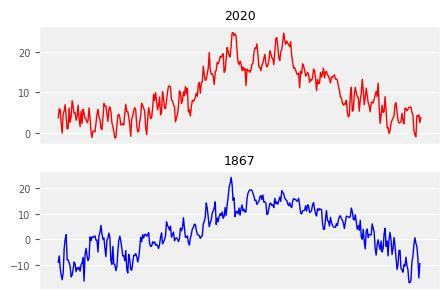

In [7]:
hottest = int(years[np.argmax(yearly_avg)])
coldest = int(years[np.argmin(yearly_avg)])

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)   
ax1.set_title(hottest)
ax1.plot(data[data[:, 0] == hottest,3], 'r')   
ax2.set_title(coldest)
ax2.plot(data[data[:, 0] == coldest,3], 'b')
ax2.set_xticks([])

fig.tight_layout();  

Po oseh se lahko sprehodimo tudi z uporabo zanke.

We can iterate through the axes with a loop.

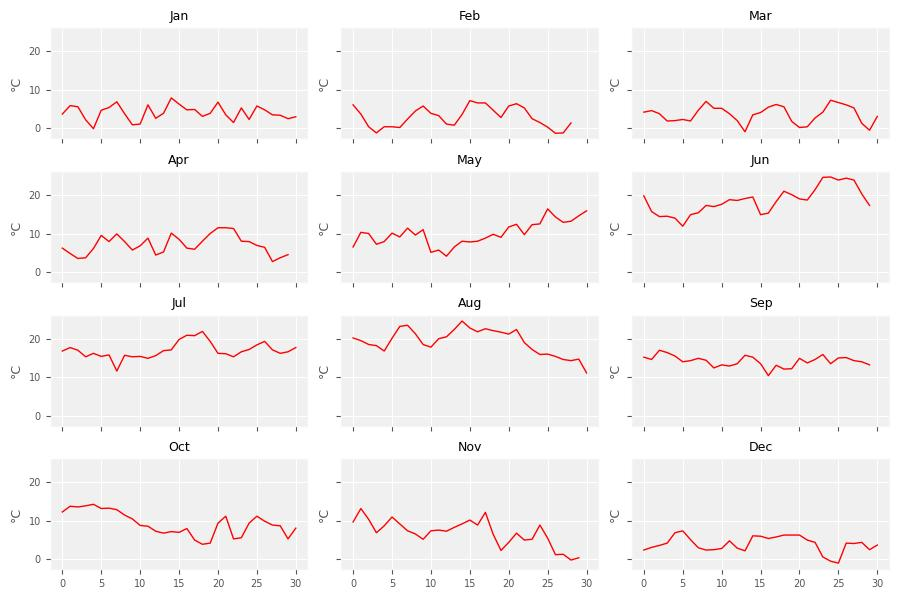

In [8]:
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(9, 6))
y = data[data[:, 0] == hottest, 1::2]
i = 1
for row in axes:
    for ax in row: 
        ax.plot(y[y[:,0]==i, 1], 'r')
        ax.set_ylabel('°C')
        ax.set_title(m[i-1])
        i+=1
fig.tight_layout()

Ustvarimo novo sliko v spremenljivki `fig` ter ji dodajmo novo osz uporabo funkcije `add_axes`. Kot parameter v seznamu lahko opišemo pravokotnik, kjer naj se nahaja os (vse vrednosti so deleži slike):
* x koordinata osi relativno na sliko,
* y koordinata osi relativno na sliko,
* širina,
* višina.

Sedaj imamo popoln nadzor nad vstavljanjem osi. Na sliko lahko dodamo poljubno število osi, ki se lahko tudi prekrivajo. 


Let's create a new image in the `fig` variable and add to it a new axis using the function `add_axes`. The first parameter is a list that describes a recatngle, where the axis will be (all values are ratios of the image):
* x coordinate of the axis, relative to the figure,
* y coordinate of the axis, relative to the figure,
* width,
* height.

Now we have complete control over the insertion of the axis. You can add an arbitrary number of axes to the picture, which may also overlap.

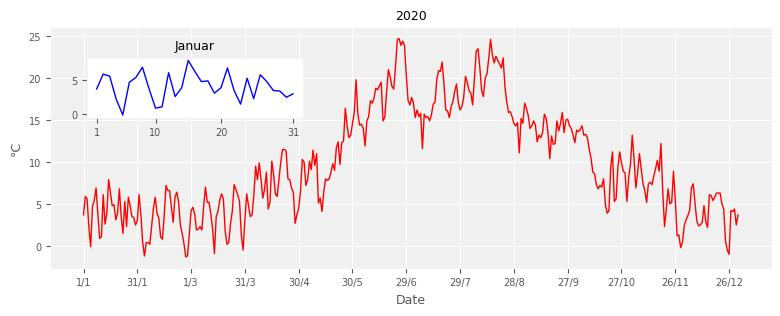

In [9]:
fig = plt.figure(figsize=(9, 3))

month = data[data[:, 0] == hottest,1].astype(int)
day = data[data[:, 0] == hottest,2].astype(int)
date = [str(d)+"/"+str(m) for d, m in zip(day, month)]

temp = data[data[:, 0] == hottest,3]

ax2.set_title(coldest)
ax2.plot(data[data[:, 0] == coldest,3], 'b');  

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
axes1.set_title(hottest) 
axes1.set_xticks([i for i in range(0, len(date), 30)])

axes1.set_xlabel('Date')
axes1.set_ylabel('°C')

axes1.plot(date, temp, 'r')   

axes2 = fig.add_axes([0.14, 0.6, 0.24, 0.2], facecolor='white') 
axes2.plot(day[:31], temp[:31], 'b')
axes2.set_title('Januar')
axes2.set_xticks([1,10,20,31]);

### Vizualizacije različnih tipov podatkov

Oglejmo si še druge metode, ki so primerne za risanje različnih tipov podatkov. Seveda je način prikaza odvisen od vrste in lastnosti podatkov, ki jo z vizualizacijo želimo poudariti.

**Stolpični diagram**

### Visualization of different types of data

Let's take a look at other methods that are suitable for drawing different types of data. Of course, the mode of display depends on the type and characteristics of the data that we want to emphasize with visualization.

**Bar chart**

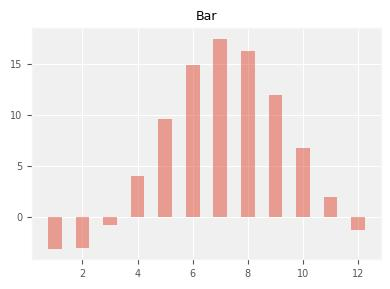

In [10]:
mon_avg = [data[data[:, 1] == m, 3].mean() for m in range(1, 13)]

plt.bar(range(1, 13), mon_avg, align="center", width=0.5, alpha=0.5)
plt.title("Bar");

**Barvanje med dvema grafoma**

**Coloring between two graphs**

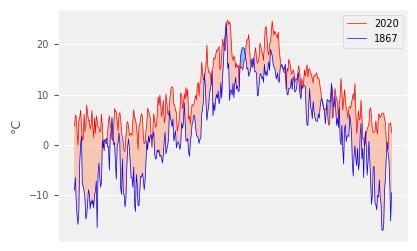

In [11]:
hot = data[data[:, 0] == hottest,3]
cold = data[data[:, 0] == coldest,3]
plt.plot(hot[:365], 'r', lw=0.5, label=hottest)
plt.plot(cold, 'b', lw=0.5, label=coldest)
plt.fill_between(range(365), hot[:365], cold, color="lightsalmon", alpha=0.5, where=hot[:365]>cold)
plt.fill_between(range(365), hot[:365], cold, color="dodgerblue", alpha=0.5, where=hot[:365]<cold)
plt.ylabel('°C')
plt.legend()
plt.xticks([]);

**Violinski in škatlasti diagram**

**Violin and box plot**

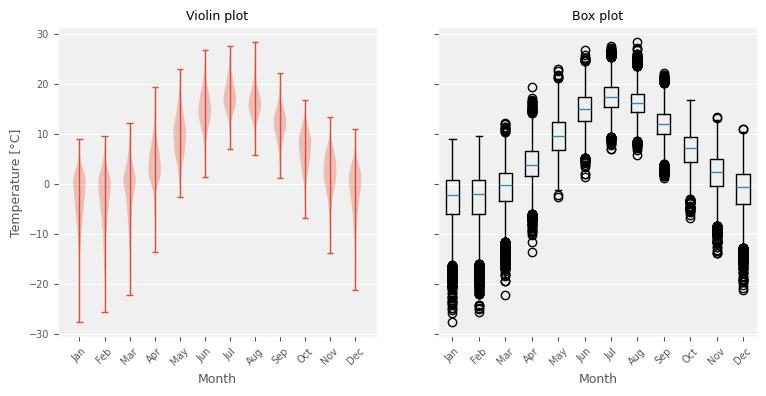

In [12]:
monthly_data = [data[data[:, 1] == i, 3] for i in range(1, 13)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

axes[0].set_title('Violin plot')
axes[0].violinplot(monthly_data)
axes[0].set_ylabel('Temperature [°C]')
axes[1].set_title('Box plot')
axes[1].boxplot(monthly_data)

for ax in axes:
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(m, rotation=45)
    ax.set_xlabel('Month');

### Verjetnostne porazdelitve

### Probability distributions

Verjetnosto porazdelitev končnega števila vzorcev pogosto predstavimo s *histogramom* - stolpičnim diagramom ki predstavlja število oz. verjetnost vrednosti spremenljivke.

Funkcija `hist` izriše stolpični diagram verjetnostne porazdelitve. 

The probability of distributing a finate number of samples is often represented by the *histogram* - a bar diagram representing the number or probability of the value of the variable.

The `hist` function displays the bar graph of the probability distribution.

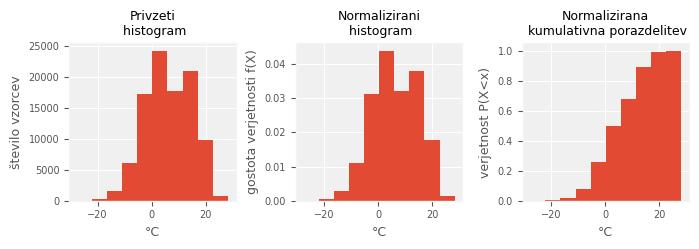

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5))

axes[0].hist(data[:,3], bins=10)
axes[0].set_title("Privzeti\n histogram")
axes[0].set_ylabel("število vzorcev")
axes[0].set_xlabel("°C")

axes[1].hist(data[:,3],  density=True, bins=10)
axes[1].set_title("Normalizirani\n histogram")
axes[1].set_ylabel("gostota verjetnosti f(X)")
axes[1].set_xlabel("°C")


axes[2].hist(data[:,3], cumulative=True, bins=10, density=True)
axes[2].set_title("Normalizirana\n kumulativna porazdelitev")
axes[2].set_ylabel("verjetnost P(X<x)")
axes[2].set_xlabel("°C")

fig.tight_layout()

### Toplotne karte

Toplotne karte (ang. `heatmap`) uporabljamo za prikazovanje funkcij dveh spremenljivk.

### Heat maps
Heat maps are used to display the functions of two variables.

In [14]:
heatmap = np.full((len(years), 12), np.nan)
for i, year in enumerate(years):
    for j in range(12):
        heatmap[i, j] = data[(data[:, 0] == year) & (data[:, 1] == j + 1), 3].mean()

V ``matplotlib`` lahko izbiramo med več možnostmi.

In `` matplotlib`` we can choose between several options.

#### Funkcija `pcolormesh`

#### The `pcolormesh` function

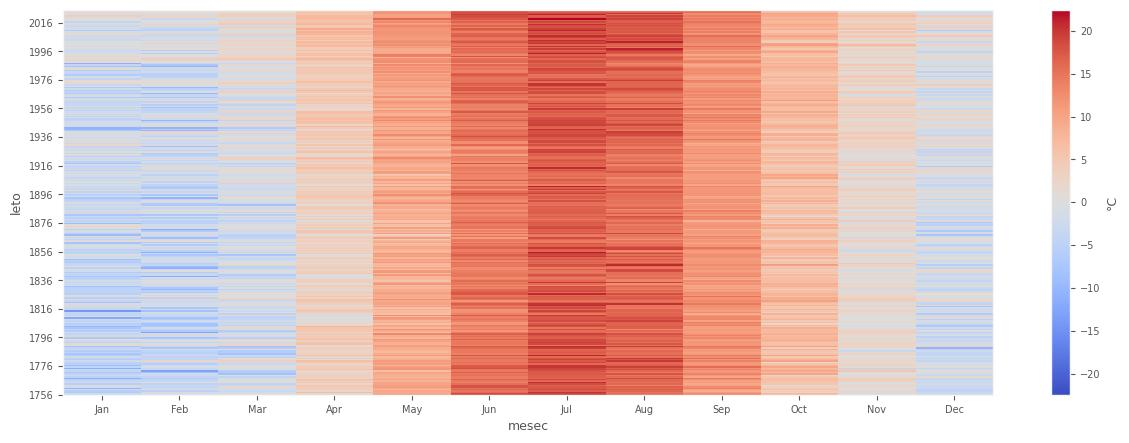

In [15]:
plt.figure(figsize=(15, 5))
limit = max(heatmap.max(), abs(heatmap.min()))

plt.pcolormesh(heatmap, cmap='coolwarm', vmin= -limit, vmax=limit)
plt.colorbar(label="°C")
plt.xlabel("mesec")
plt.ylabel("leto")
plt.yticks(ticks=np.arange(0, len(years), 20),
           labels=years[::20])
plt.xticks(ticks=np.arange(0.5, 12.5), labels=m)
plt.grid('off') 
plt.show();

#### Funkcija `imshow`

Dobimo čistejšo sliko tako, da uporabimo algoritem za interpolacijo.

#### The `imshow` function

We get a cleaner image by using an interpolation algorithm.

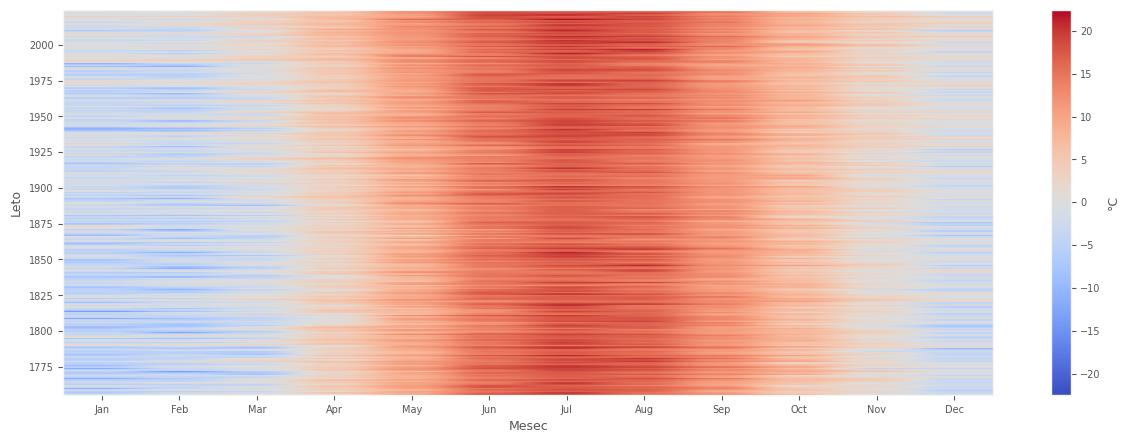

In [16]:
plt.figure(figsize=(15, 5))
plt.imshow(heatmap, aspect='auto', cmap='coolwarm', origin='lower', vmin= -limit, vmax=limit)
plt.colorbar(label="°C")
plt.xlabel("Mesec")
plt.ylabel("Leto")

plt.yticks(ticks=np.arange(19, len(years), 25),
           labels=years[19::25])
plt.xticks(ticks=np.arange(12), labels=m)
plt.grid(False) 
plt.show();

### Shranjevanje slike

Za shranjevanje uporabimo metodo `savefig`, kjer lahko izbiramo med formati PNG, JPG, EPS, SVG, PGF in PDF.

### Saving an image

To save, we use the `savefig` method, where we can choose between PNG, JPG, EPS, SVG, PGF and PDF formats.

In [17]:
fig.savefig('slika.png')

Ločljivost nastavimo v enotah DPI.

Set resolution in DPI units.

In [18]:
fig.savefig('slika.png', dpi=200)

## Knjižnica `Plotly`

Matplotlib je zmogljiv in prilagodljiv, vendar je predvsem namenjen statičnim, grafom primernih za objavo.
Plotly pa zavzame drugačen pristop, saj gre za knjižnico za risanje interaktivnih grafov.

To pomeni:

* lahko se z miško pomaknete nad točke in vidite natančne vrednosti,
* lahko povečate graf z vlečenjem miške,
* lahko premikate pogled in ga ponastavite,
* lahko v legendi vklapljate in izklapljate posamezne sledi,
* graf lahko izvozite kot PNG, SVG ali celo HTML za deljenje na spletu.

V Pythonu lahko Plotly uporabljate na dva glavna načina:

* plotly.express — visokonivojska, jedrnata sintaksa, še posebej primerna za hitre grafe iz pandas DataFrame-ov,
* plotly.graph_objects — nižjenivojski pristop, zelo prilagodljiv, podoben delu z objekti v Matplotlibu.


## Library `Plotly`

Matplotlib is powerful and flexible, but it’s mainly designed for static, publication-quality plots.
Plotly takes a different approach, as it’s a library that creates interactive plots.

This means:

* You can hover over points to see exact values,
* you can zoom in by dragging the mouse,
* you can pan around and reset the view,
* you can toggle traces on and off by clicking in the legend,
* you can export plots as PNG, SVG, or even HTML to share online.

There are two main ways to use Plotly in Python:

* plotly.express — high-level, concise syntax, especially good for quick plots from pandas DataFrames,
* plotly.graph_objects — lower-level, very customizable, similar to working with Matplotlib objects.

In [19]:
import plotly.express as px
import plotly.graph_objects as go

Za začetek spet narišimo povprečne letne temperature.

Let's start by plotting yearly averages again.

In [20]:
px.line(y=yearly_avg, x=years, title="Povprečne letne temperature", labels={"x": "Leto", "y": "Temperatura (°C)"})

Za začetek v redu, a v nadaljevanju bomo pogledali še drug pristop.

A good start, but let's look at a different approach.

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=years,
    y=yearly_avg,
    mode='lines+markers',
    line=dict(color='firebrick'),
    name='Avg Temp'
))
fig.update_layout(
    title='Average Yearly Temperature in Stockholm',
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',
    template='plotly_white'
)
fig.show()

Poglejmo, kako so se temperature spreminjale skozi daljše obdobje. Izračunajmo mesečna povprečna za 50-letna obdobja.

Let’s take a look at how temperatures have changed over a longer period. Let’s calculate monthly averages for 50-year periods.

In [22]:
intervals = np.arange(1750, 2051, 50)
five_decades = np.full((len(intervals)-1, 12), np.nan)

intervals = np.arange(1750, 2051, 50)
for i in range(len(intervals) - 1):
    start = intervals[i]
    end = intervals[i + 1]
    mask = (data[:, 0] >= start) & (data[:, 0] < end)
    for j in range(1, 13):
        monthly_avg = data[mask & (data[:, 1] == j), 3].mean()
        five_decades[i, j - 1] = monthly_avg

Krivulje za posamezno 50-letno obdobje dodamo kot sled. To nam omogoča, da jih lahko vklapljamo in izklapljamo.

We’ll add a curve for each 50-year period as a separate trace. This allows us to toggle them on and off.

In [23]:
fig = go.Figure()
for i, row in enumerate(five_decades):
    fig.add_trace(go.Scatter(
        x = m,
        y = row,
        name = "%i–%i" % (intervals[i], intervals[i+1])
    ))

fig.update_layout(
    title="Average Monthly Temperatures by 50-Year Interval",
    xaxis_title="Month",
    yaxis_title="Temperature (°C)",
)

fig.show()

Lahko tudi pobarvamo območje med dvema krivuljema.

We can also fill the area between two curves.

In [24]:
intervals = np.arange(1750, 2051, 50)
colors = px.colors.qualitative.Set2 
fig = go.Figure()

for i in range(len(intervals) - 1):
    start = intervals[i]
    end = intervals[i + 1]
    mask = (data[:, 0] >= start) & (data[:, 0] < end)

    min_temps = []
    max_temps = []
    avg_temps = []

    for j in range(1, 13):
        month_data = data[mask & (data[:, 1] == j), 3]
        if len(month_data) > 0:
            min_temps.append(month_data.min())
            max_temps.append(month_data.max())
            avg_temps.append(month_data.mean())
        else:
            min_temps.append(np.nan)
            max_temps.append(np.nan)
            avg_temps.append(np.nan)

    color = colors[i % len(colors)]
    group_name = f"{start}–{end}"

    fig.add_trace(go.Scatter(
        x=m,
        y=avg_temps,
        mode='lines+markers',
        line=dict(width=1.5, color=color),
        name=f"Avg {start}–{end-1}",
        legendgroup=group_name
    ))

    fig.add_trace(go.Scatter(
        x=m,
        y=max_temps,
        mode='lines',
        line=dict(width=0.5, color=color),
        showlegend=False,
        hoverinfo='skip',
        legendgroup=group_name,
    ))

    fig.add_trace(go.Scatter(
        x=m,
        y=min_temps,
        mode='lines',
        fill='tonexty',
        fillcolor=color.replace('rgb', 'rgba').replace(')', ',0.15)'),
        line=dict(width=0.5, color=color),
        showlegend=False,
        hoverinfo='skip',
        legendgroup=group_name,
    ))

fig.update_layout(
    title="Monthly Temperature Ranges by Half-Century",
    xaxis_title="Month",
    yaxis_title="Temperature (°C)",
    hovermode="x unified"
)

fig.show()

Pobarvano območje ima lahko gradient.

The filled area can have a gradients.

In [25]:
min_temps = []
max_temps = []
avg_temps = []

for j in range(1, 13):
    month_data = data[data[:, 1] == j, 3]
    min_temps.append(month_data.min())
    max_temps.append(month_data.max())
    avg_temps.append(month_data.mean())

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=m,
    y=max_temps,
    line=dict(color='rgba(255,0,0,0.5)'),
    mode='lines',
    name='Max temp'
))

fig.add_trace(go.Scatter(
    x=m,
    y=min_temps,
    fill='tonexty',
    fillgradient=dict(
        type='vertical',
        colorscale=[
            [1, 'rgba(255,0,0,1)'],
            [0, 'rgba(0,0,255,1)']
        ]
    ),
    line=dict(color='rgba(0,0,255,0.5)'),
    mode='lines',
    name='Min temp'
))

fig.add_trace(go.Scatter(
    x=m,
    y=avg_temps,
    line=dict(color='black', width=2),
    mode='lines+markers',
    name='Avg temp'
))

fig.update_layout(
    title="Monthly Temperature Range with Averages",
    xaxis_title="Month",
    yaxis_title="Temperature (°C)",
    hovermode="x unified"
)

fig.show()


**Toplotna karta**

**Heatmap**

In [26]:
fig = go.Figure(data=go.Heatmap(
    z=heatmap,
    x=m,
    y=years,
    colorscale='RdBu',
    reversescale=True,
    colorbar_title="°C",
    zmid=0 
))

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Year",
)

fig.show()

### Polarni graf

Polarni graf je vrsta grafa, ki prikazuje podatke v kotih in radijih namesto v kartezičnih koordinatah. Uporaben je za prikaz cikličnih podatkov, kot so sezonski vzorci ali periodični signali.

V polarnem grafu:
* kot predstavlja ciklično spremenljivko,
* radij predstavlja velikost oziroma vrednost.


### Polar Plot

A polar plot is a type of plot that displays data in terms of angles and radii, rather than Cartesian coordinates. It’s useful for visualizing cyclic data, such as seasonal patterns or periodic signals.

In a polar plot:
* the angle represents the cyclical attribute,
* the radius represents the magnitude or value.


In [27]:
month_angles = np.linspace(0, -2*np.pi, 12, endpoint=False)

fig = go.Figure()

colors = px.colors.qualitative.Set2 

for i in range(len(intervals) - 1):
    start = intervals[i]
    end = intervals[i + 1]
    mask = (data[:, 0] >= start) & (data[:, 0] < end)

    monthly_avg = np.full(12, np.nan)
    for j in range(1, 13):
        temps = data[mask & (data[:, 1] == j), 3]
        if len(temps) > 0:
            monthly_avg[j-1] = np.mean(temps)

    angles_closed = np.append(month_angles, month_angles[0])
    temps_closed = np.append(monthly_avg, monthly_avg[0])

    fig.add_trace(go.Scatterpolar(
        r=temps_closed,
        theta=np.degrees(angles_closed),
        mode='lines',
        name=f"{start}–{end}",
        line=dict(color=colors[i % len(colors)], width=2)
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(title="Temperature (°C)", angle=0),
        angularaxis=dict(
            tickmode='array',
            tickvals=np.linspace(30, 390, 12, endpoint=False),
            ticktext=m[-1::-1]
        )
    ),
    title="Polar Seasonal Plot – Average Monthly Temperatures by Half-Century",
    showlegend=True
)

fig.show()


### Animacije

Animacije v Plotly temeljijo na istih načelih kot statične vizualizacije, vendar dodajo časovno ali stanj­sko dimenzijo podatkom. Namesto da bi prikazale le en sam pogled, omogočajo prikaz, kako se vrednosti spreminjajo korak za korakom – bodisi skozi čas, kategorije ali ponovitve procesa.

### Animations

Animations in Plotly build on the same principles as static visualizations but add a temporal or state-based dimension to the data. Instead of displaying a single snapshot, they allow you to show how values evolve step by step, whether across time, categories, or iterations of a process.

In [28]:
years_rep = np.repeat(years, len(m))   # 2000, 2000, ..., 2001, ...
months_tile = np.tile(m, len(years))   # Jan, Feb, ..., Dec, Jan, ...
values_flat = heatmap.flatten() 

frames = []
for year in years:
    mask = years_rep == year
    frames.append(go.Frame(
        data=[go.Bar(x=months_tile[mask],
                     y=values_flat[mask],
                     marker_color='cornflowerblue')],
        name=str(year) 
    ))

fig = go.Figure(
    data=[go.Bar(x=m, y=values_flat[years_rep == years[0]], marker_color='cornflowerblue')],
    layout=go.Layout(
        title="Yearly Monthly Values",
        xaxis=dict(title="Month"),
        yaxis=dict(title="Value", range=[np.min(values_flat) * 1.1, np.max(values_flat) * 1.1]),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            x=1.05,
            y=1.15,
            xanchor="left",
            yanchor="top",
            buttons=[
                dict(label="Play",
                     method="animate",
                     args=[None, dict(frame=dict(duration=800, redraw=True),
                                      fromcurrent=True, transition=dict(duration=300))]),
                dict(label="Pause",
                     method="animate",
                     args=[[None], dict(frame=dict(duration=0, redraw=False),
                                        mode="immediate",
                                        transition=dict(duration=0))])
            ]
        )],
        sliders=[dict(
            active=0,
            x=0.1,
            y=-0.1,
            len=0.9,
            pad=dict(t=50, b=10),
            currentvalue=dict(prefix="Year: ", font=dict(size=16)),
            steps=[
                dict(method="animate",
                     args=[[str(year)], dict(mode="immediate",
                                             frame=dict(duration=800, redraw=True),
                                             transition=dict(duration=300))],
                     label=str(year))
                for year in y
            ]
        )]
    ),
    frames=frames
)

fig.show()


### 3D prikazovanje

Plotly podpira tudi interaktivne 3D vizualizacije, ki grafe razširijo z dodatno prostorsko dimenzijo. To omogoča prikaz bolj zapletenih podatkovnih nizov in razkrivanje vzorcev, ki jih je v 2D težje opaziti. Z vgrajenimi orodji za vrtenje, približevanje in premikanje 3D grafi spodbujajo raziskovanje ter gledalcem omogočajo, da podatke opazujejo iz različnih perspektiv.

### 3D Plotting

Plotly also supports interactive 3D visualizations, which extend charts into an additional spatial dimension. This makes it possible to represent more complex datasets and uncover patterns that are difficult to see in 2D. With built-in tools for rotation, zooming, and panning, 3D plots invite exploration and allow viewers to interact with the data from different perspectives.

In [29]:
months = np.arange(1, 13)  # month numbers for Y-axis


X, Y = np.meshgrid(years, months, indexing='ij')  
Z = heatmap 

fig = go.Figure(data=[go.Surface(
    x=X,  
    y=Y,  
    z=Z,  
    colorscale='RdBu',
    reversescale=True,
    colorbar_title="°C",
    cmid=0 
)])

fig.update_layout(
    title='3D Surface of Temperature by Year and Month',
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Month',
        yaxis=dict(
            tickmode='array',
            tickvals=np.arange(1, 13),
            ticktext=m  
        ),
        zaxis_title='Temperature (°C)'
    ),
    width=800,
    height=700
)

fig.show()